In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [26]:
dataset = pd.read_csv('C:\\Users\\adars\\OneDrive\\Desktop\\CERTIFICATIONS\\car data.csv')
# Remove entries with Null values
dataset = dataset.dropna()

In [27]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
dataset.shape

(301, 9)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [15]:
#checking the distribution of categorical data
print(dataset.Fuel_Type.value_counts())
print(dataset.Selling_type.value_counts())
print(dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Selling_type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [17]:
#encoding the categorical data
dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
dataset.replace({'Selling_type':{'Dealer':0, 'Individual':1}}, inplace=True)
dataset.replace({'Fuel_Type':{'Manual':0, 'Automatic':1}}, inplace=True)

In [18]:
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,Manual,0
1,sx4,2013,4.75,9.54,43000,1,0,Manual,0
2,ciaz,2017,7.25,9.85,6900,0,0,Manual,0
3,wagon r,2011,2.85,4.15,5200,0,0,Manual,0
4,swift,2014,4.60,6.87,42450,1,0,Manual,0


In [20]:
X = dataset.drop(['Car_Name', 'Selling_Price', 'Transmission'], axis=1)
Y = dataset['Selling_Price']

In [21]:
print(X)

     Year  Present_Price  Driven_kms  Fuel_Type  Selling_type  Owner
0    2014           5.59       27000          0             0      0
1    2013           9.54       43000          1             0      0
2    2017           9.85        6900          0             0      0
3    2011           4.15        5200          0             0      0
4    2014           6.87       42450          1             0      0
..    ...            ...         ...        ...           ...    ...
296  2016          11.60       33988          1             0      0
297  2015           5.90       60000          0             0      0
298  2009          11.00       87934          0             0      0
299  2017          12.50        9000          1             0      0
300  2016           5.90        5464          0             0      0

[301 rows x 6 columns]


In [22]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [30]:
#splitting training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [31]:
#MODEL TRAINING
#1.Linear Regression
lin_reg_model = LinearRegression()

In [32]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

In [33]:
#model evaluation 
training_data_prediction = lin_reg_model.predict(X_train)

In [34]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8716571597791493


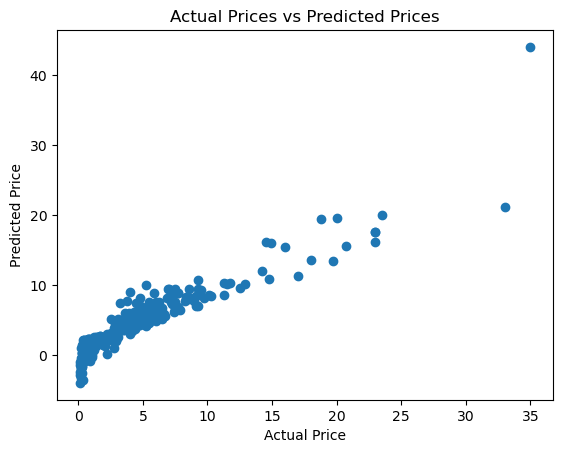

In [35]:
#visualizing the actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [36]:
test_data_prediction = lin_reg_model.predict(X_test)

In [37]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8340577535178704


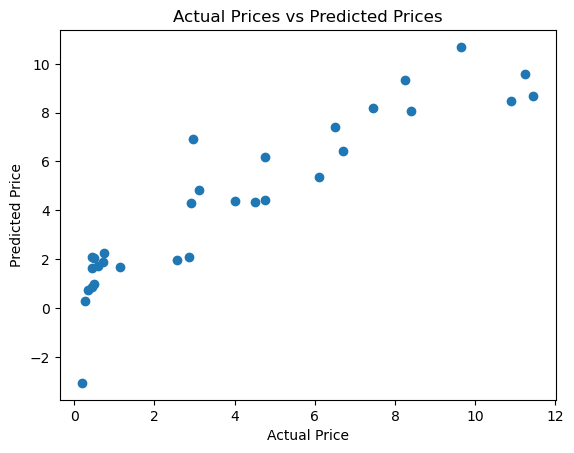

In [38]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [39]:
#2. Lasso Regression
lass_reg_model = Lasso()

In [40]:
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [41]:
#model evaluation
training_data_prediction = lass_reg_model.predict(X_train)

In [42]:
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.842448071824074


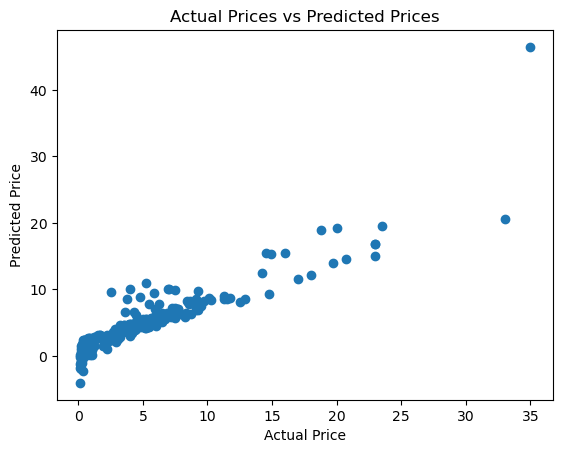

In [43]:
#visualize the actual price and predicted price
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [44]:
test_data_prediction = lass_reg_model.predict(X_test)

In [45]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8709763132343395


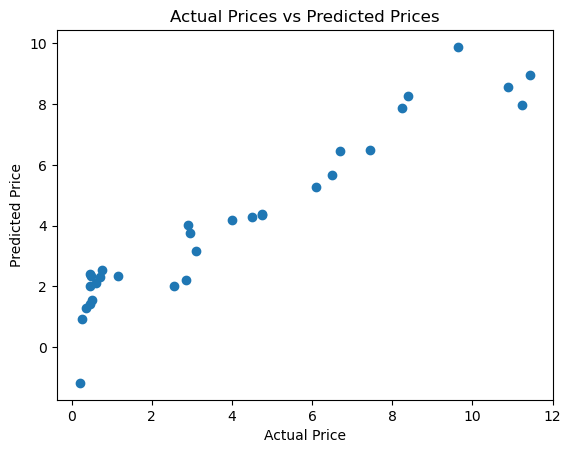

In [46]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
#hence car price prediction using machine learning was executed